Caravan Insurance Potential Customer Identification - 
**Kathakali Seth**

### Pre-Processing

###### Import Libraries

In [19]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE                   # For Oversampling
#from outliers import smirnov_grubbs as grubbs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\ashis\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
# importing pandas library
import pandas as pd
  
# reading the given csv file 
# and creating dataframe
mydata = pd.read_csv('ticdata2000.txt',delim_whitespace=True, header=None)
mydata.to_csv('ticdata2000.csv',index=None)

In [39]:
import pandas as pd
  
# reading the given csv file 
# and creating dataframe
mytestdata = pd.read_csv('ticeval2000.txt',delim_whitespace=True, header=None)
mytestdata.to_csv('ticeval2000.csv',index=None)

In [45]:
import pandas as pd
  
# reading the given csv file 
# and creating dataframe
mytesttarget = pd.read_csv('tictgts2000.txt',delim_whitespace=True, header=None)
mytesttarget.to_csv('tictgts2000.csv',index=None)

In [47]:
mytesttarget

,0
0,0
1,1
2,0
3,0
4,0
...,...
3995,0
3996,1
3997,0
3998,0


###### Read and Partition Data

In [20]:
dataset = read_csv('./ticdata2000.csv')


var=16

# print(dataset.describe())
# print('Variables selected :  ', list(dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]))

selected = dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]

X = (dataset[dataset.columns[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]].values)

dataset

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dataset1 = read_csv('./ticeval2000.csv')


var=16

# print(dataset.describe())
# print('Variables selected :  ', list(dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]))

selected = dataset1.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]

X_test = (dataset1[dataset1.columns[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]].values)

dataset1

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dataset2 = read_csv('./tictgts2000.csv')



dataset2

,0
0,0
1,1
2,0
3,0
4,0
...,...
3995,0
3996,1
3997,0
3998,0


In [52]:


# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X)

y_train = np.vstack(dataset['85'].values)

X_test = min_max_scaler.fit_transform(X_test)

y_test = np.vstack(dataset2['0'].values)

# print('\n')
# print('X and y Input Data:   ', X.shape, y.shape)


# X_train_original, X_test2, y_train_original, y_test2 = train_test_split(X, y, test_size=0.3,
#                                                                         random_state=42)

# print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)

# X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.33,random_state=42)
# # Used Seed in Partitioning so that Test Set remains same for every Run

# print('Validation Set Shape: ', X_val.shape,y_val.shape)
# print('Test Set Shape:       ', X_test.shape, y_test.shape)

In [51]:
y_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

###### Outlier Detection

In [25]:
#for i in range(var):
#    print((grubbs.test(X_train[:,i], alpha=0.025).reshape(-1)).shape)

###### Oversampling of underrepresented class

In [53]:
doOversampling = True

if doOversampling:
# Apply regular SMOTE
    sm = SMOTE()
    X_train, y_train = sm.fit_sample(X_train_original, y_train_original)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train_original
    y_train = y_train_original

Training Set Shape after oversampling:    (7692, 16) (7692,)
col_0     0     1
row_0            
0      3846     0
1         0  3846


###### Scatterplot for Variable Selection

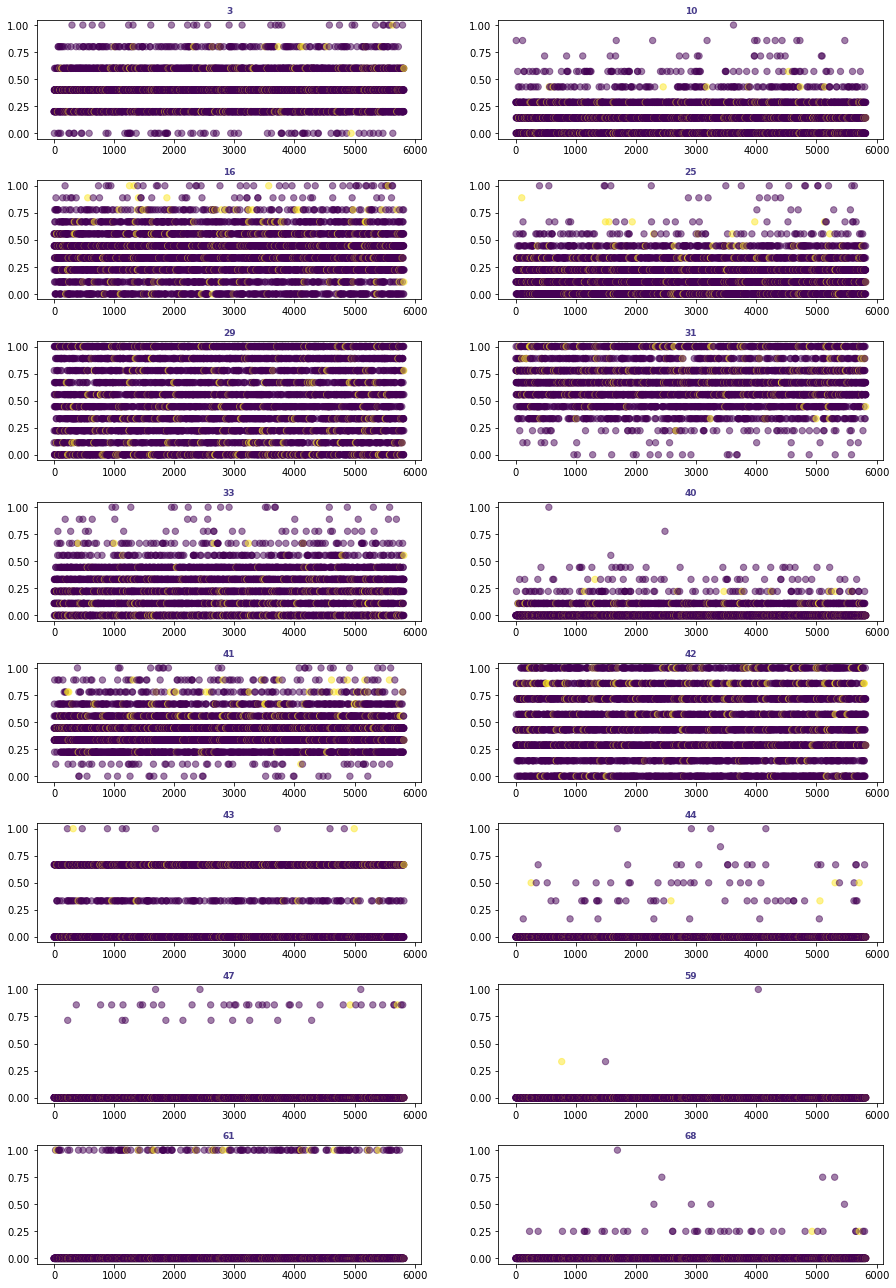

In [54]:
# Plot the feature importances of the forest

plt.figure(figsize=(6 * 2, 2.4 * int(var/2+.5)))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.title("Variable Co-relation with Outcome",size=20)
for i in range(var):
    plt.subplot(8, 2, i+1)
    plt.title(selected[i], size=9,color='darkslateblue',fontweight='bold')
    plt.scatter(range(len(X)),X[:,i], s=40, marker= 'o',c=((y[:,0:1])+0).reshape(-1), alpha=0.5)
    plt.yticks()
    plt.xticks()
plt.show()


###### Feature Reduction thru PCA - Not used in final phase

In [55]:
doPCA = False

if doPCA:
    pca = PCA(svd_solver='randomized',n_components=10,random_state=42).fit(X_train)

    X_train = pca.transform(X_train)
    #print(pca.components_)
    #print(pca.explained_variance_)
    #print(pca.explained_variance_ratio_) 
    #print(pca.mean_)
    print(pca.n_components_)
    print(pca.noise_variance_)
    plt.figure(1, figsize=(8, 4.5))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')
    plt.show()
else:
    X_train = X_train


###### Flag for Final Run

In [56]:
Final_Run = True          # Will Not Process Test Set if value is False

### Build Models

###### Decision Tree Classifier

In [57]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_split=1e-07)
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_test)
accuracy_score(y_test,y_pred_DT)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


0.89675

###### Naive Bayes Classifier

In [58]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)
#print(clf_NB.predict_proba(X_val))
accuracy_score(y_test,y_pred_NB)

0.623

###### Neural Network Classifier

In [32]:
'''
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)
'''

"\nMLPClassifier(activation='relu', alpha=1e-05,\n       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,\n       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',\n       learning_rate_init=0.001, max_iter=2000, momentum=0.9,\n       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,\n       tol=0.001, validation_fraction=0.1, verbose=True,\n       warm_start=False)\nclf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))\n\nclf_MLP.fit(X_train, y_train)\ny_pred_MLP = clf_MLP.predict(X_val)\n"

###### Logistic Regression Classifier

In [59]:
#clf_Log = LogisticRegression(solver='sag', max_iter=1000, random_state=42,verbose=2)
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_test)
print(clf_Log.coef_)
print(clf_Log.intercept_)
accuracy_score(y_test,y_pred_Log)

[LibLinear][[ 0.42732831 -0.6893508   0.29225473  0.45277679 -0.2480706   0.70772393
  -0.34635236 -2.90331558  1.46976119  0.73001204  1.17110755  0.25383658
   0.39361724  0.18178404  0.64448054 -0.93101076]]
[-1.98983223]


0.666

###### Random Forest Classifier

In [60]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
accuracy_score(y_test,y_pred_RF)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

0.9185

###### AdaBoost Classifier

In [61]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_test)
accuracy_score(y_test,y_pred_AdaB)

0.91975

###### Gradient Boost Classifier

In [62]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_test)
accuracy_score(y_test,y_pred_GB)

0.92325

###### Extra Tree Classifier

In [63]:
clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf_ET.fit(X_train, y_train)
y_pred_ET = clf_ET.predict(X_test)
accuracy_score(y_test,y_pred_ET)

0.9175

###### SVM Classifier

In [64]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)
accuracy_score(y_test,y_pred_SVM)

[LibSVM]

0.76925

In [66]:
print("highest Accuracy is for Gradient boost with accuracy: 92.35%")

highest Accuracy is for Gradient boost with accuracy: 92.35%
